In [1]:
import pandas as pd

# Load the dataset
file_path = 'car data.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(car_data.head())




  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [2]:
# Display basic information about the dataset
print(car_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [3]:
# Display summary statistics of the dataset
print(car_data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

In [5]:
# Define features and target variable
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

# Preprocessing for categorical data
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = OneHotEncoder(drop='first')


In [15]:
# Extract the brand from the Car_Name
car_data['Brand'] = car_data['Car_Name'].apply(lambda x: x.split(' ')[0])

In [6]:
# Create new` features
car_data['Age'] = 2024 - car_data['Year']
car_data['Log_Driven_kms'] = np.log1p(car_data['Driven_kms'])
car_data['Present_Price_Age'] = car_data['Present_Price'] * car_data['Age']


In [7]:
# Define features and target variable
X = car_data.drop(['Car_Name', 'Selling_Price', 'Year', 'Driven_kms'], axis=1)
y = car_data['Selling_Price']

# Preprocessing for categorical data
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = OneHotEncoder(drop='first')

# Preprocessing for numerical data
numerical_features = ['Present_Price', 'Age', 'Log_Driven_kms', 'Owner', 'Present_Price_Age']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [8]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with a more advanced model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [10]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.6453950819672133
Mean Squared Error: 0.9423161877049175
Root Mean Squared Error: 0.970729719182903


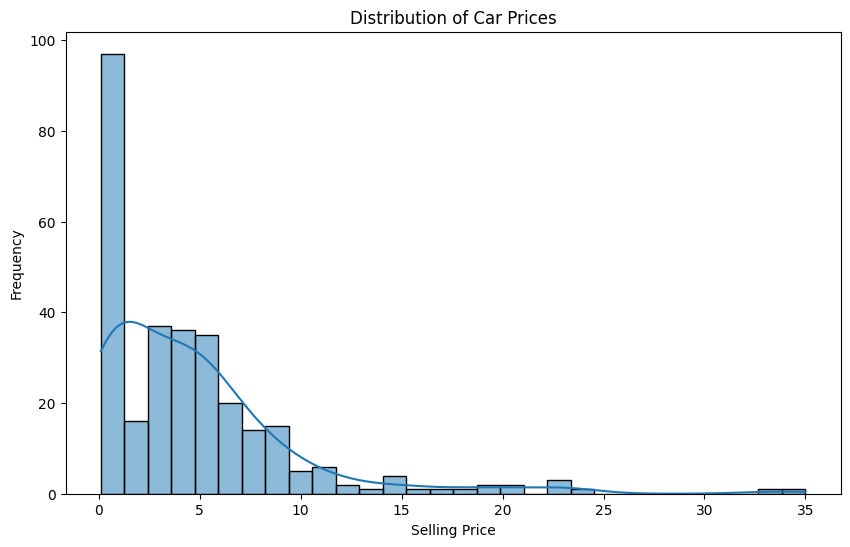

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


C:\Users\prati sanghvi\AppData\Local\Temp\ipykernel_47648\3514299715.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car_data.corr()


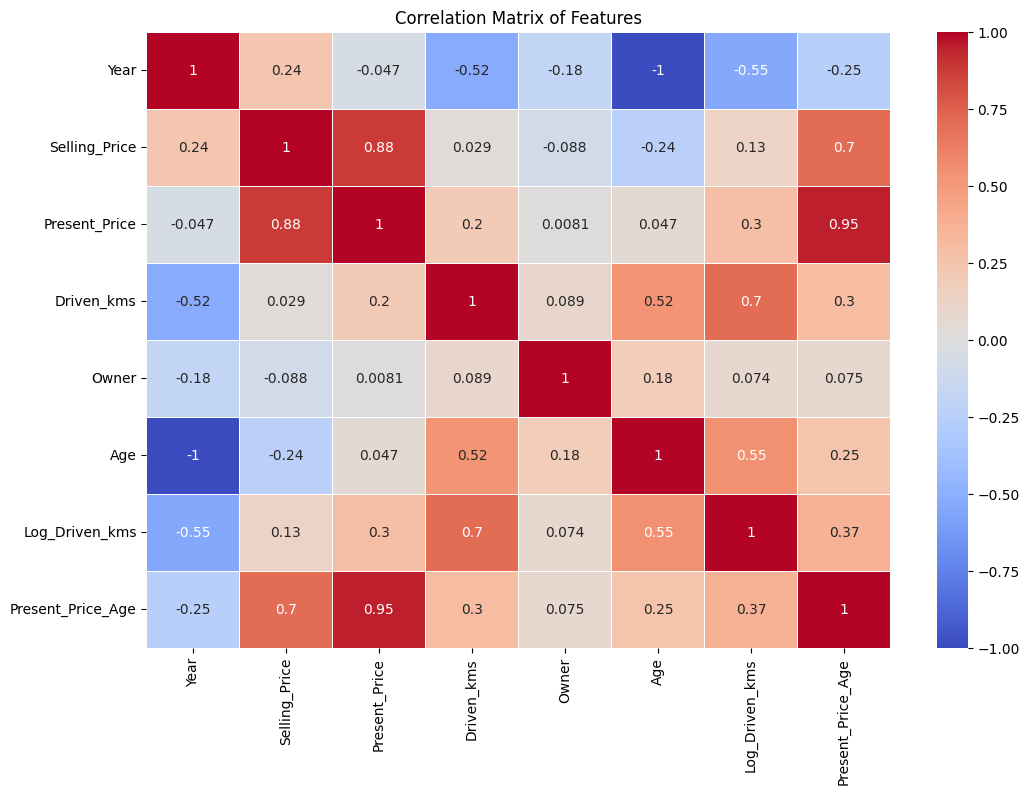

In [12]:
# Compute the correlation matrix
correlation_matrix = car_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


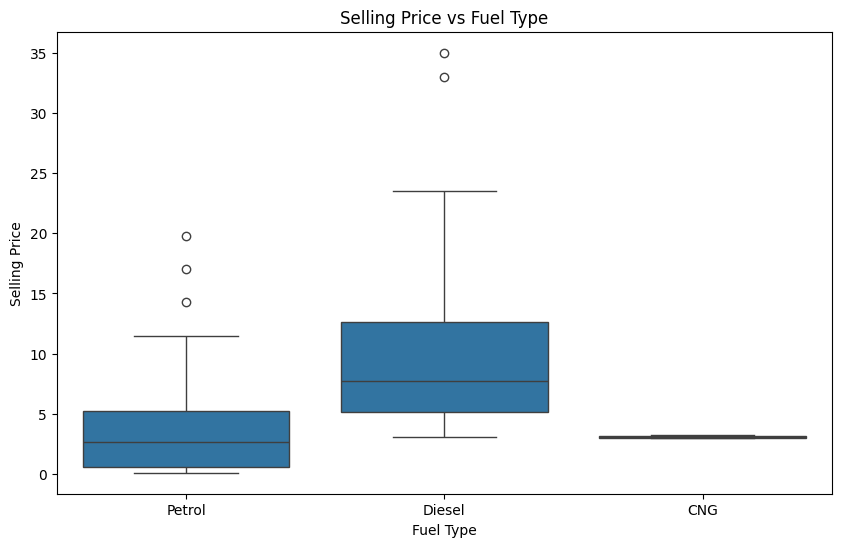

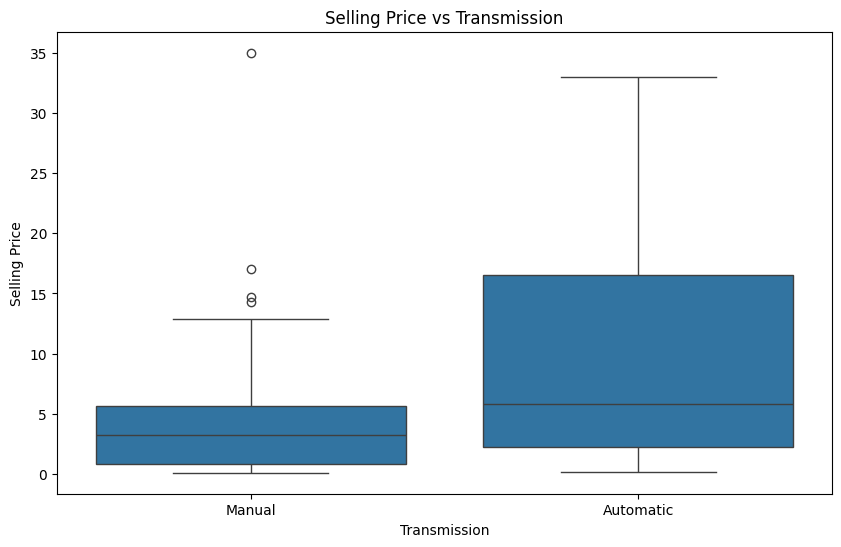

In [13]:
# Boxplot for Fuel Type vs Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

# Boxplot for Transmission vs Selling Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()


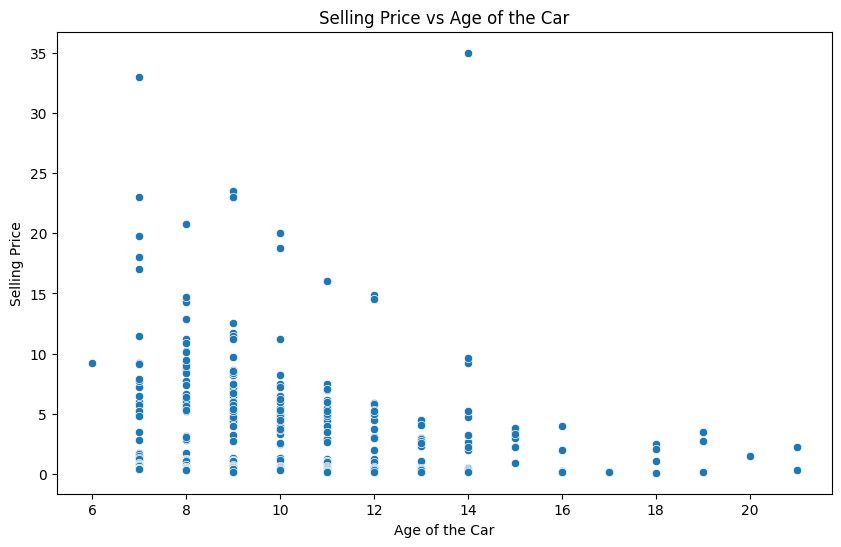

In [14]:
# Create a new feature for car age
car_data['Age'] = 2024 - car_data['Year']

# Scatter plot for Age vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Selling_Price', data=car_data)
plt.title('Selling Price vs Age of the Car')
plt.xlabel('Age of the Car')
plt.ylabel('Selling Price')
plt.show()
